In [61]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os, glob
import gzip,tarfile

# class ImageMaker:
#     '''
#     한 장의 사진으로 회전, 대칭 등 변환해서 여러장으로 만드는 클래스
#     data_path_ :  원본 데이터 경로
#     new_path_: 새롭게 저장할 경로
#     title_:이미지 파일 이름
#     '''

#     # 객체 생성
#     def __init__(self,data_path_,new_path_,title_):
#         self.data_path=data_path_
#         self.new_path = new_path_
#         self.title = title_
#         self.num_i = 1

#     # 새로운 폴더 만들기
#     def create_new_folder(self):
#         if not os.path.exists(self.new_path):
#             os.makedirs(self.new_path)
#         else:pass

#     # 이미지 크기 조절, 그레이 스케일, 누끼 등
#     def resize_images(self,dsize_):
#         images=glob.glob(self.data_path+'*')

#         for image in images:
#             org=cv2.imread(image,cv2.IMREAD_GRAYSCALE)  # 그레이스케일
            
#             # 배경 지우기(누끼 따기)
#             # org=remove(org)

#             '''이미지 크기 조절
#             - cv2.resize(src,이미지크기)
#             - src : 원본이미지'''
#             resized_=cv2.resize(org,dsize_)
#             cv2.imwrite(self.new_path+f'{self.title}_{self.num_i}.png',resized_)
#             self.num_i += 1


#     # 이미지 회전
#     def rotate_images(self,degrees_):
#     # 회전 행렬 생성 : cv2.getRotationMatrix2D(중심축,각도,비율)
#     # 회전 변환 행렬에 따른 회전 이미지 반환: cv2.warpAffine(src,회전 행렬,(w,h))
#         images=glob.glob(self.new_path+'*')

#         for image in images:
#             img=cv2.imread(image)
#             # 이미지 높이, 너비 채널 정보 추출 => 높이 , 너비 이용 회전 중심점 설정
#             h,w,c=img.shape

#             for degree in degrees_:
#                 matrix=cv2.getRotationMatrix2D((w/2,h/2),degree,0.9) #<= 비율
#                 rotate_=cv2.warpAffine(img,matrix,(w,h))
#                 cv2.imwrite(image.replace('.png',f'_rotate({degree}).png'),rotate_)
    
#     # # 이미지 블러
#     # def blur_images(self,blur_range):
#     # # cv2.GaussianBlur(src,ksize,표준편차)
#     # # ksize: 커널 크기. (가로, 세로) 튜플 (홀수만), 크기 커질수록 블러 강화
#     #     images=glob.glob(self.new_path+'*')

#     #     for image in images:
#     #         img=cv2.imread(image)

#     #         for b in blur_range:
#     #             blur_=cv2.GaussianBlur(img,(b,b),0)
#     #             cv2.imwrite(image.replace('.png',f'_blur({b}).png'),blur_)


#     # 실행 !!!!!!!!!!!!!!!
#     def run(self):
#         self.create_new_folder()
#         self.resize_images((28,28))  #<= 크기 
#         degrees1=list(range(1,11,1))+list(range(350,360,1))
#         self.rotate_images(degrees1)

# # 폴더 불러오기
# filepath='./HAND/'
# files=glob.glob(filepath+'*')
# files

# for image_folder in files:
#     data_path=image_folder+'/'
#     new_path=f'{image_folder[:2]}new{image_folder[2:]}/'
#     title=f'{image_folder[7:]}'
#     name=title+'maker'
#     name=ImageMaker(data_path, new_path, title)
#     name.run()

In [62]:
# 폴더 불러오기
filepath='./newHAND/'
files=glob.glob(filepath+'*')
files

data_list = []
label_list = []

for image_folder in files:
    imgs = glob.glob(image_folder + '/*')
    label_list.extend([f'{image_folder[11:]}']*len(imgs))

    for img_path in imgs:
        # 이미지 파일 읽기 
        img = cv2.imread(img_path).reshape(-1)
        data_list.append(img)

# 리스트를 NumPy 배열로 변환
imgNP = np.array(data_list).astype('uint16')     # 용량 많.astype('uint16')으면  # 써서 줄이기
label = np.array(label_list)

#스케일링
imgNP=imgNP/255

print(imgNP.shape, label.shape,imgNP.size)

(9114, 2352) (9114,) 21436128


In [63]:
# # 라벨 원핫인코딩
# from keras.utils import to_categorical
# label_encoded=to_categorical(label)
# label_encoded

In [64]:
data_list = []
label_list = []
label_Dict={
    'J1': 0, 'J2': 1, 'J3': 2, 'J4': 3, 'J5': 4, 'J6': 5, 'J7': 6, 'J8': 7, 'J9': 8, 'J10': 9,
    'J11': 10, 'J12': 11, 'J13': 12, 'J14': 13, 'M1': 14, 'M2': 15, 'M3': 16, 'M4': 17, 'M5': 18,
    'M6': 19, 'M7': 20, 'M8': 21, 'M9': 22, 'M10': 23, 'M11': 24, 'M12': 25, 'M13': 26, 'M14': 27,
    'M15': 28, 'M16': 29, 'M17': 30
}

for image_folder in files:
    imgs = glob.glob(image_folder + '/*')
    # label_list.extend(str(label_Dict[f'{image_folder[10:]}'])*len(imgs))
    label = label_Dict[f'{image_folder[10:]}']

    for img_path in imgs:
        # 이미지 파일 읽기 
        img = cv2.imread(img_path) #,cv2.IMREAD_GRAYSCALE
        data_list.append(img)
        label_list.append(label)

# 리스트를 NumPy 배열로 변환
imgNP = np.array(data_list).astype('uint8')     # 용량 많.astype('uint16')으면  # 써서 줄이기
label = np.array(label_list)

#스케일링
imgNP=imgNP/255    # 배경 흑백 하고 싶으면 (255-imgNP)

print(imgNP.shape, label.shape,imgNP.ndim)

(9114, 28, 28, 3) (9114,) 4


In [68]:
from sklearn.model_selection import train_test_split
import autokeras as ak
import tensorflow as tf

train_X, test_X, train_y, test_y = train_test_split(imgNP, label, stratify=label, test_size=0.2, random_state=10)

# 오토케라스 분류 모델 생성
clf = ak.ImageClassifier(overwrite=True, max_trials=1)  # max_trials은 시도할 모델의 수를 설정합니다.

# 모델 훈련
history = clf.fit(train_X, train_y, epochs=100)

# 모델 평가
score = clf.evaluate(test_X, test_y)
print('Test accuracy:', score)

Trial 1 Complete [00h 05m 38s]
val_loss: 0.0034491722472012043

Best val_loss So Far: 0.0034491722472012043
Total elapsed time: 00h 05m 38s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/100
228/228 [==============================] - 10s 40ms/step - loss: 1.6472 - accuracy: 0.5105
Epoch 2/100
228/228 [==============================] - 10s 44ms/step - loss: 0.3305 - accuracy: 0.8954
Epoch 3/100
228/228 [==============================] - 11s 47ms/step - loss: 0.1429 - accuracy: 0.9571
Epoch 4/100
228/228 [==============================] - 11s 49ms/step - loss: 0.1010 - accuracy: 0.9696
Epoch 5/100
228/228 [==============================] - 11s 49ms/step - loss: 0.0829 - accuracy: 0.9757
Epoch 6/100
228/228 [==============================] - 10s 43ms/step - loss: 0.0579 - accuracy: 0.9827
Epoch 7/100
228/228 [==============================] - 9s 40ms/step - loss: 0.0386 - accuracy: 0.9886
Epoch 8/100
228/228 [==============================] - 8s 33ms/step - loss: 0.0432 - accuracy: 0.9864
Epoch 9/100
228/228 [==============================] - 7s 31ms/step - loss: 0.0314 - accuracy: 0.9905
Epoch 10/100
228/228 [==============================] - 7s 32ms/step - loss:

INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


57/57 [==============================] - 1s 7ms/step - loss: 0.0185 - accuracy: 0.9984
Test accuracy: [0.018517427146434784, 0.9983543753623962]


In [138]:
# 최적의 모델을 추출하고 저장
best_model = clf.export_model()
best_model.save('./final_best_model_100.h5')

c:\Users\user\anaconda3\envs\MY_PYTHON3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [139]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os, glob
import gzip,tarfile
import random

In [143]:
# 모듈 불러오기
from keras.models import load_model
# final_model=load_model('./models/modeltest.h5')  #윤성원
# final_model=load_model('./models/model_hand.hdf5')  # 박선경
final_model = load_model('./final_best_model_100.h5')

In [146]:
# 폴더 불러오기
files=['./test_img\\test (1).jpg','./test_img\\test (2).jpg','./test_img\\test (3).png',
       './test_img\\test (4).jpg','./test_img\\test (5).jpg','./test_img\\test (6).jpg',
       './test_img\\test (7).jpg','./test_img\\test (8).jpg','./test_img\\test (9).png','./test_img\\test (10).jpg',
       './test_img\\test (11).jpg','./test_img\\test (12).jpg','./test_img\\test (13).jpg','./test_img\\test (14).jpg',
       './test_img\\test (15).png','./test_img\\test (16).jpg']

In [167]:
def model_predict(image_list, resize_, model):
    predict_list=[]
    for img_path in image_list:
        
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 이미지를 BGR에서 RGB로 변환
        img = cv2.resize(img, resize_)  # 이미지 크기 조정

        # 이미지를 모델이 예상하는 형식으로 전처리
        img = img / 255.0  # 이미지를 0~1 범위로 스케일링
        img = np.expand_dims(img, axis=0)  # 배치 차원 추가 (1개의 이미지를 처리하기 위해)

        predictions = model.predict(img)  # 예측

        label_class = {
        0: 'ㄱ', 1: 'ㄴ', 2: 'ㄷ', 3: 'ㄹ', 4: 'ㅁ', 5: 'ㅂ', 6: 'ㅅ', 7: 'ㅇ', 8: 'ㅈ', 9: 'ㅊ',
        10: 'ㅋ', 11: 'ㅌ', 12: 'ㅍ', 13: 'ㅎ', 14: 'ㅏ', 15: 'ㅑ', 16: 'ㅓ', 17: 'ㅕ', 18: 'ㅗ',
        19: 'ㅛ', 20: 'ㅜ', 21: 'ㅠ', 22: 'ㅡ', 23: 'ㅣ', 24: 'ㅐ', 25: 'ㅒ', 26: 'ㅔ', 27: 'ㅖ',
        28: 'ㅢ', 29: 'ㅚ', 30: 'ㅟ'
        }
        predicted_class = np.argmax(predictions)
        predicted_label = label_class[predicted_class]
        predict_list.append(predicted_label)
    print(predict_list)

# 예시로 파일 리스트(files)를 사용하여 모델 예측

predict_list=model_predict(files, (28,28), final_model)

1/1 [==============================] - 0s 17ms/step
['ㅂ', 'ㅣ', 'ㄱ', 'ㅂ', 'ㅜ', 'ㄴ', 'ㅋ', 'ㅣ', 'ㅎ', 'ㅗ', 'ㅏ', 'ㅇ', 'ㅣ', 'ㅌ', 'ㅣ', 'ㅇ']


In [133]:
# 모델 평가
score = clf.evaluate(test_X, test_y)
print('Test accuracy:', score)

57/57 [==============================] - 0s 6ms/step - loss: 0.0185 - accuracy: 0.9984
Test accuracy: [0.018517427146434784, 0.9983543753623962]


In [134]:
# 모델 훈련
history = clf.fit(train_X, train_y, epochs=10, validation_split=0.2)

In [136]:
image_path = './test_img/test_sung_2.jpg'
image = cv2.imread(image_path)
image = image[1500:3000, :1500]
image = cv2.resize(image, (28, 28))

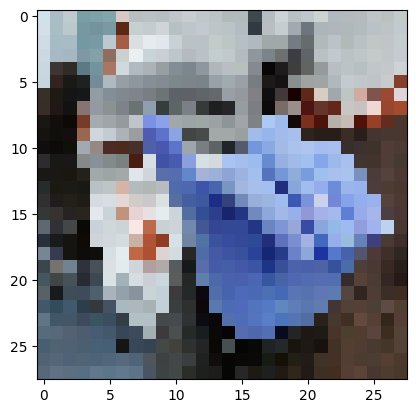

In [120]:
plt.imshow(image)

In [121]:
image_array = np.array(image)
image_array = image_array.astype('float32') / 255.0
image_array = image_array.reshape(1, 28, 28, 3)

1/1 [==============================] - 0s 11ms/step
Predicted Class Label: 0


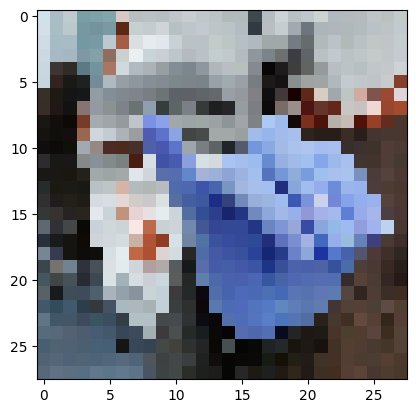

In [122]:
# 예측된 인덱스를 클래스 레이블로 변환
predictions = clf.predict(image_array)
predicted_class = np.argmax(predictions)
# predicted_class_label = class_labels[predicted_class]
plt.imshow(image)

print("Predicted Class Label:", predicted_class)